이번 프로젝트의 목표는 정기예금을 가입할 확률이 높은 고객군을 찾아낼 수 있는 예측 모델을 개발하는 것입니다. 주어진 데이터는 포르투갈의 한 은행의 고객 정보로, 고객 45,211명의 정기예금 가입 여부 및 관련된 개인 정보와 마케팅 이력이 담겨 있어요. 데이터를 살펴보며 예측 모델의 성능을 높여줄 의미 있는 변수들을 선택한 후, 적절한 머신 러닝 모델을 선택해 고객의 정기예금 가입 여부를 예측하는 분류 모델을 완성해 주시면 됩니다. 어떻게 해야 할지 잘 모르겠다면 아래 가이드라인을 참고하여 코드를 작성해 보세요!

데이터 설명
age: 나이
job: 직업
admin: 관리직
blue-collar: 현장 근로자
entrepreneur: 기업가
housemaid: 가정부
management: 경영직
retired: 은퇴자
self-employed: 자영업자
services: 서비스업 종사자
student: 학생
technician: 기술자
unemployed: 실업자
unknown: 알 수 없음
marital: 결혼 상태
divorced: 이혼 혹은 사별
married: 기혼
single: 미혼
unknown: 알 수 없음
education: 교육 수준
primary: 초등 교육
secondary: 중등 교육
tertiary: 고등 교육
unknown: 알 수 없음
default: 디폴트(채무 불이행) 여부 (yes or no)
balance: 연평균 통장 잔고 (단위: 유로)
housing: 주택 담보 대출 여부 (yes or no)
loan: 개인 대출 여부 (yes or no)
contact: 연락 수단 유형
cellular: 휴대전화
telephone: 유선전화
unknown: 알 수 없음
day: 마지막으로 고객에게 연락했던 일자(1~31의 숫자로 표기)
month: 마지막으로 고객에게 연락했던 월 (jan~dec의 문자로 표기)
campaign: 이번 캠페인 기간 동안 고객에게 연락한 횟수
pdays: 이전 캠페인 기간의 마지막 연락 이후 경과한 일수 (단, -1은 해당 고객에게 이전에 연락한 적이 없다는 의미)
previous: 이번 캠페인 기간 이전에 고객에게 연락한 횟수
poutcome: 이전 캠페인의 결과
success: 성공
failure: 실패
other: 기타
unknown: 알 수 없음
y: 해당 분류 문제의 y값, 즉 정답. 고객의 정기예금 가입 여부 (yes or no)

In [1]:
import pandas as pd

# 소숫점 둘째 자리 까지로 제한 
# pd.options.display.float_format = '{:,.2f}'.format 

bank_df = pd.read_csv('/Users/florajeong/Desktop/UCLA/Prep/Codeit Data Science/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


### Data Cleaning

In [2]:
# 1. Check for Null Values 
bank_df.isnull().sum()

# 1.1 IF above had null values
# bank_df[bank_df.isna().any(axis=1)] # Get all rows with null in any one of the columns 
# bank_df.dropna() # Drop all rows with null in any one of the columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
# 2. Outlier 확인 
bank_df.describe(include='all')

# 2.1 IF outliers exist from above - Exclude Outliers for Numeric Columns (using IQR) 
# # numeric_columns = bank_df.select_dtypes(include='number').columns # All Numeric Columns 
# numeric_columns = ['balance'] # 해당 사항 있는 Numeric Column 들만 (Ex. P days 는 doesn't make sense to remove outliers) 

# bank_df_cleaned = bank_df 

# for col in numeric_columns:
#     Q1 = bank_df_cleaned[col].quantile(0.25)
#     Q3 = bank_df_cleaned[col].quantile(0.75)
#     IQR = Q3 - Q1 

#     lower_bound = Q1 - (IQR * 1.5)
#     upper_bound = Q3 + (IQR * 1.5)

#     bank_df_cleaned = bank_df_cleaned[(bank_df_cleaned[col] >= lower_bound) & (bank_df_cleaned[col] <= upper_bound)]
    
# bank_df_cleaned.describe()


# 2.2 Visualize that Outliers have been removed 

# import matplotlib.pyplot as plt 

# plt.figure(figsize=(10,4))
# plt.scatter(x=bank_df_cleaned['age'], y=bank_df_cleaned['balance'])
# plt.show()

# plt.figure(figsize=(10,4))
# plt.scatter(x=bank_df['age'], y=bank_df['balance'])
# plt.show()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
import numpy as np
# Pdays = -1은 그 전에 연락한 적이 없는 것이기 때문에 NaN으로 바꿔줌 
bank_df['pdays'] = bank_df['pdays'].replace(-1, np.nan)

In [5]:
# 3. Duplicate 확인 
bank_df.duplicated().sum() # If > 0, means there's dupliacted data 

# 3.1 Duplicate 존재하면 Keep only 1 

# print(f"Rows that need to be dropped: {bank_df.shape}")
# print(f"Rows that need to be dropped: {bank_df[bank_df.duplicated()].sort_values(by='age').shape}")

bank_df[bank_df.duplicated(keep=False)].sort_values(by='age') # Look at the duplicates
bank_df = bank_df.drop_duplicates() # Keep only 1
bank_df.duplicated().sum() # Should be 0 now (check if the duplicates have been removed successfully) 

# print(f"Final Rows: {bank_df.shape}")


0

### EDA

모델링에 앞서 데이터를 전반적으로 파악하고 어떤 변수가 의미가 있을지 미리 추측해 보는 EDA(Exploratory Data Analysis) 과정입니다.

#### Numeric Variables

In [6]:
numeric_features = bank_df.select_dtypes('number').columns
numeric_features

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [7]:
bank_df.groupby('y')[numeric_features].mean()

,age,balance,day,campaign,pdays,previous
y,,,,,,
no,40.840525,1304.237684,15.890518,2.846539,234.191436,0.502356
yes,41.670070,1804.267915,15.158253,2.141047,192.521785,1.170354


가입자들이 balance 가 더 높고, 비가입자들이 마지막 연락 이후 경과일수가 더 길다 

#### Categorical Variables

In [8]:
categorical_features = bank_df.select_dtypes('object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

##### Job

In [9]:
#Series를 DataFrame으로 바꿔주면서 Series의 값을 담고 있는 컬럼에 '이름'을 붙여줌 
count_df = bank_df.groupby(['y', 'job']).size().reset_index(name='count') 

count_df.sort_values(by='count', ascending=False).head()
# count_df[count_df['y'] == 'no'].sort_values(by='count', ascending=False).head()
# count_df[count_df['y'] == 'yes'].sort_values(by='count', ascending=False).head()

,y,job,count
1,no,blue-collar,9022
4,no,management,8150
9,no,technician,6753
0,no,admin.,4540
7,no,services,3783


In [10]:
# transform() = 특정 함수를 받아 Series의 각 값을 해당 방식대로 변형해 주는 함수 
# transform() 함수를 GroupBy 객체에 적용할 경우 그루핑 기준이 된 특정 변수를 중심으로 값을 변형하겠다는 의미가 됨 
count_df['pct'] = count_df.groupby('y')['count'].transform(lambda x: x / x.sum()) 
count_df.head()

,y,job,count,pct
0,no,admin.,4540,0.113767
1,no,blue-collar,9022,0.226081
2,no,entrepreneur,1364,0.034180
3,no,housemaid,1131,0.028342
4,no,management,8150,0.204230


In [11]:
# 각각 Y, N 의 PCT 인 것
count_df.groupby('y')['pct'].sum()

y
no     1.0
yes    1.0
Name: pct, dtype: float64

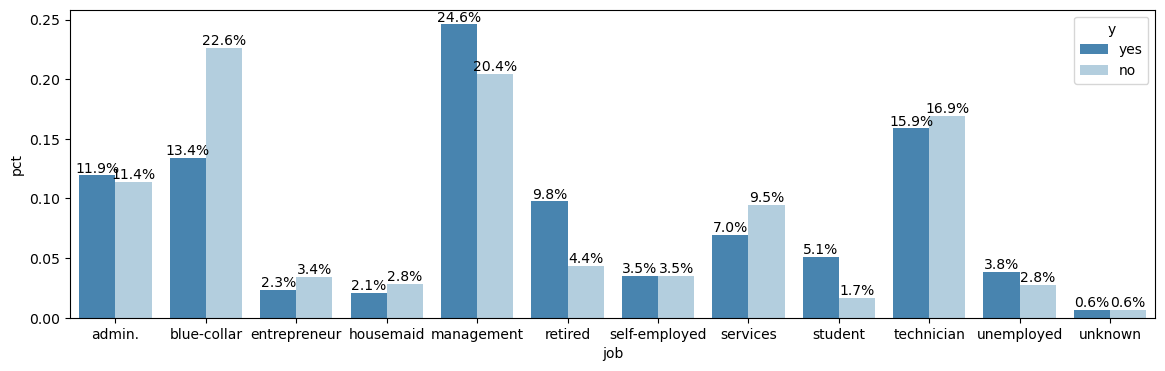

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt  

fig, ax = plt.subplots(figsize=(14, 4))
sns.barplot(data=count_df, x="job", y="pct", hue="y", hue_order=['yes', 'no'], palette="Blues_r", ax=ax)

# 막대 위에 해당되는 수치를 함께 시각화해 주는 코드입니다.
for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}');  # fmt = format. 소수점 한자리까지의 % 형태로 값을 나타내겠다는 의미입니다.

##### Marital Status

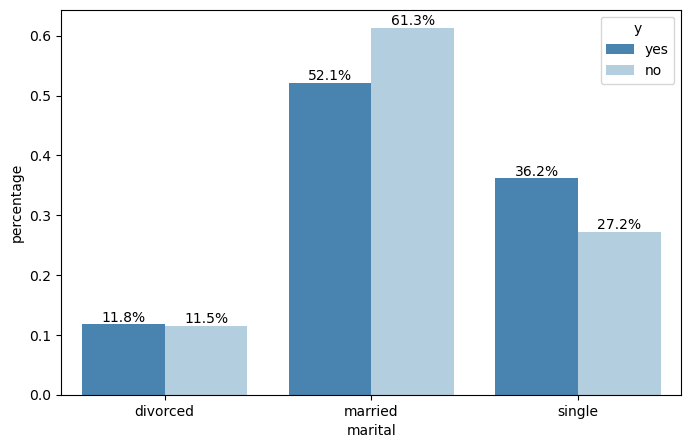

In [17]:
count_df = bank_df.groupby(['y', 'marital']).size().reset_index(name='count')
count_df['percentage'] = count_df.groupby('y')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=count_df, x="marital", y="percentage", hue="y", hue_order=['yes', 'no'], palette="Blues_r", ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}');

가입자 그룹에서 상대적으로 미혼(single)의 비중이 높은 편으로 나타납니다. 다만 기혼(married) 고객이 절대적으로 많은 편이다 보니 실제 가입자 내에서 가장 많은 비중을 차지하는 건 기혼 고객들입니다.

##### Education

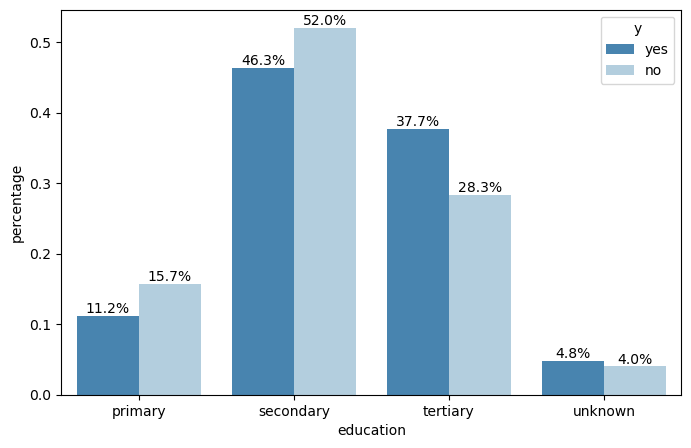

In [18]:
count_df = bank_df.groupby(['y', 'education']).size().reset_index(name='count')
count_df['percentage'] = count_df.groupby('y')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=count_df, x="education", y="percentage", hue="y", hue_order=['yes', 'no'], palette="Blues_r", ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}');

가입자 그룹에서 상대적으로 고등 교육(tertiary)까지 이수한 고객의 비중이 높은 편으로 나타납니다. 다만 절대적인 고객수의 차이 영향으로 실제 가입자 내에서 가장 많은 비중을 차지하는 건 중등 교육(secondary)까지 이수한 고객입니다.

### Preditive Modeling  

#### Data Preparation

목표 변수(y) = 정기 예금 가입 여부인 분류 모델 
Classification Model 의 종류 
- Logistic Regression
- K Nearest Neighbour
- Decision Tree (Classification Tree)

Ensemble Model 의 종류
- Random Forest 

pdays 컬럼은 이전 캠페인 기간의 마지막 연락 이후 경과한 일수를 나타내는데, 여기에는 -1이라는 값이 포함되어 있습니다. -1은 해당 고객에게 이전에 연락한 적이 없다는 의미이므로 다른 수치와 연속적으로 해석되기 어렵습니다.
(1에서 2로 변화하는 구간은 마지막 연락 이후 경과 일수가 1 증가한다는 뜻인데, -1에서 0으로 변화하는 구간은 동일하게 1의 차이이지만 내포하고 있는 의미가 다르기 때문입니다.)

그러므로 pdays 컬럼은 범주형 변수로 바꿔 사용하겠습니다.

In [113]:
# # pdays_category라는 커스텀 함수를 만든 후, apply() 함수를 사용해 수치에 따른 그룹 정보를 연결해 주겠습니다.
def pdays_category(pdays): 
    if pd.isna(pdays):
        return '연락_X'
    elif pdays < 100:
        return '<100일 이내'
    elif pdays < 200:
        return '<200일 이내'
    elif pdays <300:
        return '300일 이내'
    else:
        return '300일 이상' 

bank_df['pdays_category'] = bank_df['pdays'].apply(pdays_category)
bank_df[['pdays_category']].value_counts()
# bank_df.groupby('pdays_category')['pdays'].unique()

pdays_category
연락_X              36938
<200일 이내           2879
300일 이상            2497
300일 이내            1474
<100일 이내           1407
Name: count, dtype: int64

In [120]:
# Target Variable Assignemnt
 # 정기 예금 가입자 = 1, 비가입자 = 0 으로 바꿔줌 (근데 굳이 숫자로 안 바꿔도 모델이 알아서 바꿔주기는 함) 
y = bank_df['y']
y = y.apply(lambda x: 1 if x == 'yes' else 0)
y.value_counts()

y
0    39906
1     5289
Name: count, dtype: int64

In [125]:
# Feature Variables Assignment
X = bank_df.drop(['y','pdays'], axis=1)  #pdays 대신 pdays_category 사용
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,senior_ind,age_group,segment,age_balance_group,pdays_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,non-senior,young_adult,other,other,연락_X
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,non-senior,young_adult,other,other,연락_X
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,non-senior,young_adult,other,other,연락_X
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,non-senior,young_adult,other,other,연락_X
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,non-senior,young_adult,other,other,연락_X


In [126]:
# One Hot Encode Categorical Features 
categorical_features = X.select_dtypes(include='object').columns # List of Categorical Features Column Name
print(categorical_features)

# return original df with now One hot encoded categorical feature columns
X = pd.get_dummies(X, columns=categorical_features, dtype='int') # 이때, dtype='int' 통해 boolean 형태 대신 0, 1의 숫자형으로 반환도 가능 
X.head()


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'senior_ind', 'age_group', 'segment',
       'age_balance_group', 'pdays_category'],
      dtype='object')


,age,balance,day,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,senior_ind_non-senior,senior_ind_senior,age_group_children,age_group_senior,age_group_young_adult,segment_other,segment_senior,age_balance_group_other,age_balance_group_senior,age_balance_group_young_high_balance,pdays_category_300일 이내,pdays_category_300일 이상,pdays_category_<100일 이내,pdays_category_<200일 이내,pdays_category_연락_X
0,58,2143,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1
1,44,29,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1
2,33,2,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1
4,33,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1


#### Initial Model

In [148]:
# Train/Test Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31636, 64)
(13559, 64)
(31636,)
(13559,)


In [149]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

In [150]:
# Model Accuracy = 전체 데이터 중 실제 값으로 올바르게 예측된 데이터의 비율 (same as 'accuracy' from the classification_report) below
model.score(X_test, y_test)

0.8938712294416993

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11944
           1       0.73      0.17      0.28      1615

    accuracy                           0.89     13559
   macro avg       0.82      0.58      0.61     13559
weighted avg       0.88      0.89      0.86     13559



[classification_report 읽는 법]

클래스 0은 정기예금 비가입자를 의미하며, 클래스 1은 정기예금 가입자를 의미합니다.

precision: 모델이 True로 분류한 데이터 중 실제로 True인 데이터의 비율입니다. 클래스 0의 경우 90%, 클래스 1의 경우 73%로, 이는 모델의 클래스 0에 대한 예측력이 클래스 1보다 높음을 의미합니다.

recall: 실제로 True에 속한 데이터 중 모델이 True로 분류한 데이터의 비율입니다. 클래스 0의 경우 99%, 클래스 1의 경우 17%로, 클래스 0은 precision보다 recall이, 클래스 1은 반대로 recall보다 precision이 높게 나타나고 있습니다. **실제로는 0인데 모델이 1로 분류하는 데이터보다 실제로는 1인데 모델이 0으로 분류하는 데이터가 많기 때문에 이런 현상이 나타나는 것으로 보입니다.**

참고로 support는 해당 클래스에 속하는 실제 데이터의 수를 의미합니다. 이를 보면 실제로 0에 속하는 데이터가 훨씬 많기 때문에, 모델이 '애매할 때는 0으로 분류하는 편이 정답 확률이 높다'고 인식하고 1보다는 0이라는 예측값을 더 자주 부여하고 있는 것이라 추측해 볼 수 있습니다.

f1-score: precision과 recall의 조화 평균으로, 두 값을 균형 있게 반영한 점수입니다. 클래스 0의 경우 94%, 클래스 1의 경우 28%로, 모델이 클래스 0은 비교적 정확하게 예측하고 있으나 클래스 1의 예측에는 어려움을 겪고 있다고 해석할 수 있습니다.

accuracy: 전체 데이터 중 실제 값으로 올바르게 예측된 데이터의 비율입니다. 본 모델은 전체 데이터의 89%가 정확하게 예측되었으나, 사실 이 데이터셋은 y값의 불균형이 크기 때문에(= 클래스 0이 훨씬 많기 때문에) accuracy만으로 모델의 성능을 평가하기보다는 각 클래스별 f1-score를 함께 고려하는 편이 좋습니다.

macro avg, weighted_avg: macro avg는 위의 클래스별 값을 단순 평균 낸 개념이며, weighted avg는 각 클래스에 속하는 데이터의 개수를 반영해 가중 평균을 낸 개념입니다.

그렇다면 더 나은 성능의 모델을 만들기 위해 더 적절한 파라미터를 찾을 수 있을까?
→ Yes. We can use GridSearchCV to systematically search for the best parameter values.

In [157]:
# Searching for best Parameters 
from sklearn.model_selection import GridSearchCV


# 그리드 서치를 통해 테스트해 보고 싶은 하이퍼파라미터를 dictionary 형태로 적어 줍니다.
hyper_parameter = {
    'n_estimators': [100, 200],  # 생성할 Tree의 수를 의미합니다.
    'max_depth': [None, 10, 20],  # Tree의 최대 깊이를 의미합니다.
    'class_weight': [None, 'balanced', 'balanced_subsample']  # 클래스별 가중치를 줄 것인지를 의미합니다.
}

model = RandomForestClassifier()  # 우선, 하이퍼파라미터를 설정하지 않은 모델을 만들어 줍니다.

grid_search = GridSearchCV(estimator=model, param_grid=hyper_parameter,
                           scoring='f1',  # 최선의 조합을 찾을 때 어떤 지표를 기준으로 삼느냐를 의미합니다. 여기에서는 'f1'을 기준으로 삼겠다고 명시했습니다.
                           cv=3)  # 교차 검증(cross validation)을 몇 겹으로 할지를 의미합니다. cv=3이면 3겹 교차검증을 하겠다는 의미입니다.


grid_search.fit(X_train, y_train)
print("찾아낸 최적의 파라미터: ", grid_search.best_params_)  # 찾아낸 최선의 조합을 출력합니다.

찾아낸 최적의 파라미터:  {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}


#### Rerun the Model with the found Best Parameters 


In [162]:
# 찾아낸 최적의 파라미터:  {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced') # In this case 'balanced' makes sense because the sample size for each class is imbalanced
model.fit(X_train, y_train)
y_test_preidcted = model.predict(X_test)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11944
           1       0.73      0.17      0.28      1615

    accuracy                           0.89     13559
   macro avg       0.82      0.58      0.61     13559
weighted avg       0.88      0.89      0.86     13559



In [163]:
# Model Performance of the new model
print(classification_report(y_test, y_test_preidcted))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11944
           1       0.35      0.58      0.44      1615

    accuracy                           0.82     13559
   macro avg       0.65      0.72      0.67     13559
weighted avg       0.87      0.82      0.84     13559



클래스 1에 recall/f1 score은 올라갔으나 반대로 precision 과 클래스 0에 대한 score 들이 떨어졌습니다.

🟢 Model 1:
- High overall accuracy and weighted F1 — but only because it mostly predicts class 0 correctly.
- Terrible performance on class 1 (only 17% recall) — it misses most positives.
- If class 1 is rare but important (e.g., fraud detection, churn, disease), this model is bad.

🟡 Model 2:
- Lower overall accuracy (because it makes more mistakes on the majority class 0).
- But it performs much better on class 1, with:
- Recall of 0.58 (vs. 0.17)
- F1 of 0.44 (vs. 0.28)
- If detecting class 1 is important, Model 2 is clearly better.



In real-world problems where you're trying to detect something rare and important like

- customers likely to churn
- fraud or security breaches
- rare but costly behaviors

you care more about class 1 recall and F1 than accuracy.

**So Model 2 is the better model, unless you explicitly care more about class 0.**



더 나은 모델을 만들기 위해서는 아래와 같은 방법을 검토해 볼 수 있습니다. 본 파일은 예시이기 때문에 모델을 튜닝해 가는 과정을 자세하게 담고 있지는 않지만, 실전 모델링에서는 다양한 방법을 검토해 최고의 성능을 갖는 모델을 만들어 나가시기 바랍니다.

1. Random Forest 외의 다른 분류 모델을 활용
2. 추가적인 하이퍼파라미터 튜닝
3. 입력 변수의 조정

#### Feature Importance 

In [185]:
ftr_imp_values = model.feature_importances_
# ftr_importances = pd.Series(ftr_imp_values, index=X_train.columns)
# ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]  # 중요도 순서대로 top 10 변수를 추출합니다.

# or if want to put it in a dataframe:  
ftr_importances = pd.DataFrame({'importance': ftr_imp_values, 'features': X_train.columns})
ftr_top10 = ftr_importances.sort_values(by='importance', ascending=False)[:10]  # 중요도 순서대로 top 10 변수를 추출합니다.

ftr_top10

,importance,features
47,0.108179,poutcome_success
32,0.072534,contact_unknown
1,0.059617,balance
30,0.051342,contact_cellular
0,0.049134,age
27,0.044337,housing_yes
4,0.043831,previous
2,0.043749,day
26,0.042146,housing_no
63,0.035759,pdays_category_연락_X


/var/folders/wd/k8bhnlr94jb3l5fvbl852pph0000gn/T/ipykernel_31310/3582416288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top10['importance'], y=ftr_top10['features'], palette='Blues_r');
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarn

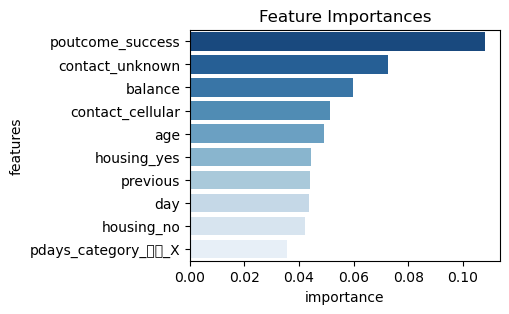

In [186]:
# Visualization 
plt.figure(figsize=(4,3))
plt.title('Feature Importances')
sns.barplot(x=ftr_top10['importance'], y=ftr_top10['features'], palette='Blues_r');

#### Partial Dependence Plot

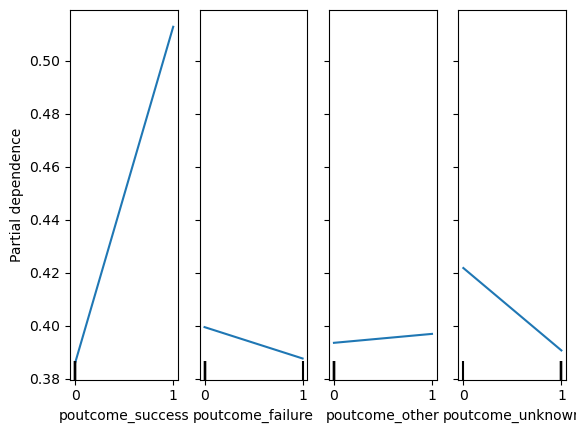

In [188]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_train,  # 학습된 모델과 X값을 넣어 줍니다.
                                        features=['poutcome_success', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown'],  # list 안에 확인할 대상이 되는 입력변수의 정보를 넣어 줍니다.
                                        n_cols=4,  # 그래프에 최대 몇 개까지의 열을 허용할 것인지에 대한 값입니다. default는 3이며, 이 경우 네 개의 변수를 비교해 보고 싶으므로 4로 설정해 주었습니다.
                                        kind='average',  # default 값이 'average'이며, 이는 데이터셋에 있는 모든 샘플에 대한 partial dependence 수치를 평균 내어 보여주겠다는 의미입니다.
                                                         # kind='individual'로 설정하면 모든 샘플의 값을 다 보여주는 ICE plot이 그려집니다.
);

poutcome_success가 1로 갈수록 정기예금 가입 가능성이 높아지는 형태가 관찰됩니다. poutcome_success에서 1은 이전 캠페인의 결과가 성공이었음을 의미하므로, 이전 캠페인의 결과가 성공이었을 경우 고객의 정기예금 가입 가능성이 높게 예측되고 있다고 해석할 수 있습니다.

poutcome_success가 1로 갈수록 정기예금 가입 가능성이 높아지는 형태가 관찰됩니다. poutcome_success에서 1은 이전 캠페인의 결과가 성공이었음을 의미하므로, 이전 캠페인의 결과가 성공이었을 경우 고객의 정기예금 가입 가능성이 높게 예측되고 있다고 해석할 수 있습니다.

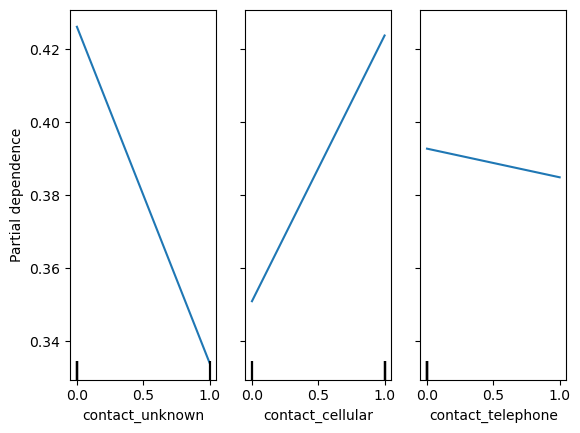

In [189]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['contact_unknown', 'contact_cellular', 'contact_telephone'],  kind='average');

contact_unknown에서 1은 고객에게 연락할 수 있는 수단을 모른다는 의미입니다. 고객의 연락 수단을 알 수 없는 경우 고객의 정기예금 가입 가능성이 낮게 예측되고 있음을 확인할 수 있습니다.

그리고 반대로 contact_cellular의 경우 1로 갈수록 정기예금 가입 가능성이 높게 예측되고 있는데, contact_cellular에서 1은 고객에의 연락수단이 휴대전화임을 의미합니다. 즉, 고객의 연락수단을 모르는 경우보다 휴대전화 번호를 알고 있는 경우에 정기예금 가입 가능성이 높게 예측된다고 해석할 수 있습니다.

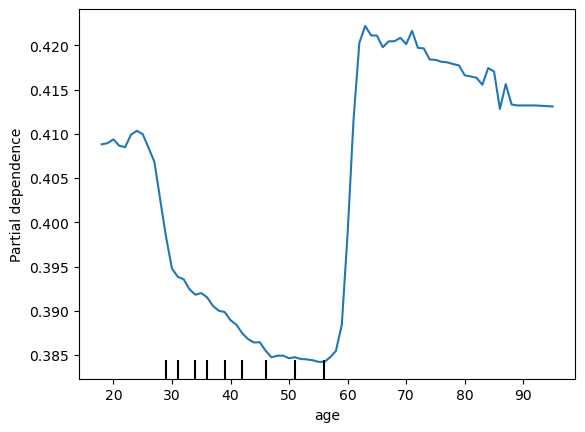

In [190]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['age'],  kind='average');

고객의 나이가 20대 이하인 경우 & 60대 이상인 경우에서 정기예금 가입 가능성이 높게 예측되고 있음을 확인할 수 있습니다.

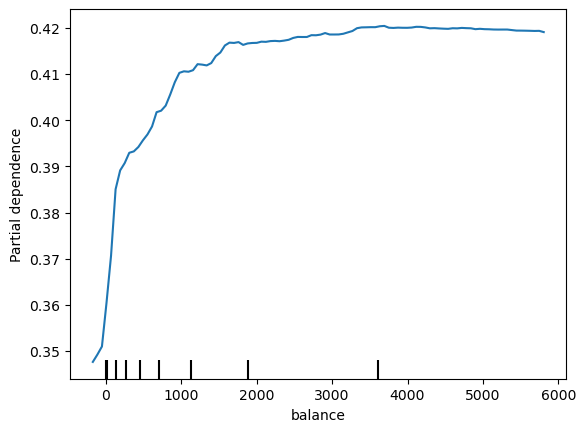

In [192]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['balance'],  kind='average');

balance는 고객의 연평균 통장 잔고입니다. 금액이 많을수록 정기예금 가입 가능성이 높아지는 경향이 있으며, 2000유로 이상부터는 큰 차이는 없음을 확인할 수 있습니다.

### Results Interpretation

결론 - 모델링 결과

고객의 과거 캠페인 결과, 연락 수단 정보, 나이, 통장 잔고 등의 정보를 통해 정기예금 가입 가능성이 높은 고객을 80~90% 정도의 정확도로 예측할 수 있음
단, 정기예금을 가입할 고객에 대한 예측보다 가입하지 않을 고객에 대한 예측 정확도가 더 높으므로, 모델링 결과를 활용할 때 이 사실을 참고할 필요가 있음

향후의 마케팅 전략에 대한 아이디어 제안

- 10대~20대 혹은 아예 60대 이상일 경우 정기예금 가입 가능성이 높아지므로, 두 세대를 각각 다르게 공략할 방안이 필요 (예: 20대 이하에게는 학생 및 사회초년생을 위한 상품을 안내, 60대 이상에게는 퇴직 후의 자금 관리를 위한 상품을 안내)
- 이전 캠페인에서 성공적인 결과가 있었던 경우 정기예금 가입 가능성이 높아지므로, 다음 캠페인 고민시 해당 캠페인을 참고한다면 도움이 될 수 있음
- 고객과의 연락수단이 휴대전화인 경우 정기예금 가입 가능성이 높아지므로, 고객이 휴대전화를 기본 연락수단으로 설정하도록 독려하는 것도 도움이 될 수 있음
고객의 통장 잔고가 2000유로 이상인 경우 정기예금 가입 가능성이 높게 나타나므로, 해당 수준 이상인 고객을 마케팅 시 최우선 타게팅하는 방안을 고민 가능

### Python Code Notes 

#### Iloc vs Loc

In [51]:
# 결과 같음 
bank_df.loc[bank_df['age'] < 30, ['age','job']].head()
bank_df[bank_df['age'] < 30][['age','job']].head() #Multiple Column 이니 대괄호 2개여함 (첫번째 for indexing, 두번째 for making it as list)

,age,job
6,28,management
11,29,admin.
20,28,blue-collar
23,25,services
36,25,blue-collar


In [55]:
bank_df[bank_df['age'] < 30]['age'] #Column 1 개 refer 할꺼면 대괄호 1개면 됨

6        28
11       29
20       28
23       25
36       25
         ..
45192    29
45193    28
45196    25
45203    23
45205    25
Name: age, Length: 5272, dtype: int64

In [56]:
# Refer to specific row: 
bank_df[bank_df['age'] < 30].iloc[6]

age                  24
job          technician
marital          single
education     secondary
default              no
balance            -103
housing             yes
loan                yes
contact         unknown
day                   5
month               may
campaign              1
pdays               NaN
previous              0
poutcome        unknown
y                    no
Name: 54, dtype: object

#### Applying Case When Statements: 

##### 1. Binary Categories

In [61]:
bank_df['senior_ind'] = np.where(bank_df['age'] >= 65, 'senior', 'non-senior')
bank_df['senior_ind'] = bank_df['age'].apply(lambda x: 'senior' if x >= 65 else 'non-senior')
bank_df['senior_ind'].value_counts()

senior_ind
non-senior    44385
senior          810
Name: count, dtype: int64

##### 2. Multiple Categories

In [93]:
bins = [0, 30, 65, np.inf] # bins=[]에는 근데 < 0 , >65 은 또 포함 안 됨 --> 추가로 np.inf 따로 넣어줘야함
labels = ['children', 'young_adult', 'senior']
bank_df['age_group'] = pd.cut(bank_df['age'], bins=bins, labels=labels, right=False)

bank_df['age_group'].value_counts()
# bank_df.groupby('age_group')['age'].unique() # Get all unique age in each age group
# bank_df.groupby('age_group')['age'].apply(lambda x: sorted(x.unique())) # Get all unique age in each age group, sorted by age

age_group
young_adult    39113
children        5272
senior           810
Name: count, dtype: int64

In [92]:
conditions = [
    bank_df['age'] < 30,
    bank_df['age'] < 65,
    bank_df['age'] >= 65
]
choices = ['children', 'young_adult', 'senior']
bank_df['age_group'] = np.select(conditions, choices, default='unknown')

bank_df['age_group'].value_counts()

age_group
young_adult    39113
children        5272
senior           810
Name: count, dtype: int64

In [95]:
# If the condition refers to multiple columns, this is the best practice
def age_group_categories(age):
    if age < 30:
        return 'children'
    elif age < 65:
        return 'young_adult'
    elif age >= 65:
        return 'senior'
    else:
        return 'NaN'

bank_df['age_group'] = bank_df['age'].apply(age_group_categories)

bank_df['age_group'].value_counts()

age_group
young_adult    39113
children        5272
senior           810
Name: count, dtype: int64

In [100]:
# IF multiple column condition, the function takes DF as input, instead of single column (Hence need to add axis=1 in apply.())
def label_customer(df):
    if df['age'] < 30 and df['balance'] > 20000:
        return 'young_high_balance'
    elif df['age'] >= 65:
        return 'senior'
    else:
        return 'other'

bank_df['age_balance_group'] = bank_df.apply(label_customer, axis=1)
bank_df['age_balance_group'].value_counts()

age_balance_group
other                 44373
senior                  810
young_high_balance       12
Name: count, dtype: int64